In [1]:
!unzip '/content/Question 1.zip'

unzip:  cannot find or open /content/Question 1.zip, /content/Question 1.zip.zip or /content/Question 1.zip.ZIP.


In [2]:
!unzip '/content/medical-records-10-yrs.zip'

Archive:  /content/medical-records-10-yrs.zip
replace medical-records-10-yrs/encounter.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace medical-records-10-yrs/lab_results.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace medical-records-10-yrs/encounter_dx.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace medical-records-10-yrs/medication_fulfillment.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [3]:
!pip install category_encoders

In [4]:
#importing Libraries 
import csv
import category_encoders
import random
import numpy as np


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
# Importing the reader from CSV library
from csv import reader

# Load the csv file
def load_csv(filename):
    # List which will store whole data
    data = list()
    with open(filename,'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            data.append(row)
    return data

# Path of dataset
filename ='medical-records-10-yrs/encounter.csv'
data1 = load_csv(filename)

# Let's print first 5 datapoints
print(data1[0:1])
print(data1[1:2])

[['Provider_Org', 'Encounter_ID', 'Member_ID', 'Provider_ID', 'Provider_NPI', 'Clinic_ID', 'Encounter_DateTime', 'Encounter_Description', 'CC', 'Episode_ID', 'Patient_DOB', 'Patient_Gender', 'Facility_Name', 'Provider_Name', 'Specialty', 'Clinic_Type', 'lab_orders_count', 'lab_results_count', 'medication_orders_count', 'medication_fulfillment_count', 'vital_sign_count', 'therapy_orders_count', 'therapy_actions_count', 'immunization_count', 'Has_Appt', 'SOAP_Note', 'consult_ordered', 'Disposition']]
[['ExactData Medical Health System', 'L8694502508698944760', '568001602-01', '663746638', '2531462832', 'Sidney Hillman Health Center', '2005-06-30T19:15:00Z', 'Lacy visited primary care physician on 6/30/2005 2:15:00 PM for ChiefComplaint', 'mild occasional lightheadedness', 'L8694502508698944760', '02/24/1972', 'female', '', 'Athena V Morris, MD', 'FAMILY PRACTICE/PRIMARY CARE', 'outpatient_medical', '1', '0', '1', '0', '7', '0', '1', '0', 'True', 's:a 33 year old female crystallographer p

In [6]:

# Path of dataset
filename ='medical-records-10-yrs/encounter_dx.csv'
data2 = load_csv(filename)

# Let's print first 5 datapoints
print(data2[0:1])

[['Provider_Org', 'code', 'vocab', 'description', 'severity', 'Encounter_ID']]


In [7]:
# Path of dataset
filename ='/content/medical-records-10-yrs/medication_fulfillment.csv'
data3 = load_csv(filename)

# Let's print first 5 datapoints
print(data3[0:1])

[['Provider_Org', 'Order_ID', 'Member_ID', 'Prescription', 'Pharmacist_ID', 'Pharmacy_Name', 'Dispense_Date', 'Drug_Name', 'Drug_NDC', 'Sig', 'Dispense_Qty', 'Fill_No', 'Fill_Status', 'Dose', 'Units', 'Days_Of_Supply', 'Encounter_ID']]


In [8]:
# Path of dataset
filename ='/content/medical-records-10-yrs/lab_results.csv'
data4 = load_csv(filename)

# Let's print first 5 datapoints
print(data4[0:1])

[['Provider_Org', 'Member_ID', 'Date_Collected', 'Test_ID', 'Specialty', 'Panel', 'Test_LOINC', 'Test_Name', 'Date_Resulted', 'Specimen', 'Result_LOINC', 'Result_Name', 'Result_Status', 'Result_Description', 'Numeric_Result', 'Units', 'Abnormal_Value', 'Reference_Range', 'Order_ID', 'Provider_ID', 'Encounter_ID']]


In [9]:
print(len(data1),len(data2),len(data3),len(data4))


5448 3064 1177 7510


In [10]:
data1[0:1]

[['Provider_Org',
  'Encounter_ID',
  'Member_ID',
  'Provider_ID',
  'Provider_NPI',
  'Clinic_ID',
  'Encounter_DateTime',
  'Encounter_Description',
  'CC',
  'Episode_ID',
  'Patient_DOB',
  'Patient_Gender',
  'Facility_Name',
  'Provider_Name',
  'Specialty',
  'Clinic_Type',
  'lab_orders_count',
  'lab_results_count',
  'medication_orders_count',
  'medication_fulfillment_count',
  'vital_sign_count',
  'therapy_orders_count',
  'therapy_actions_count',
  'immunization_count',
  'Has_Appt',
  'SOAP_Note',
  'consult_ordered',
  'Disposition']]

In [11]:
data1[1:2]

[['ExactData Medical Health System',
  'L8694502508698944760',
  '568001602-01',
  '663746638',
  '2531462832',
  'Sidney Hillman Health Center',
  '2005-06-30T19:15:00Z',
  'Lacy visited primary care physician on 6/30/2005 2:15:00 PM for ChiefComplaint',
  'mild occasional lightheadedness',
  'L8694502508698944760',
  '02/24/1972',
  'female',
  '',
  'Athena V Morris, MD',
  'FAMILY PRACTICE/PRIMARY CARE',
  'outpatient_medical',
  '1',
  '0',
  '1',
  '0',
  '7',
  '0',
  '1',
  '0',
  'True',
  's:a 33 year old female crystallographer presents with mild spells of vertigo, mild headaches particularly at the back of the head and in the morning x 2 weeks. pt also reports chronic mild occasional lightheadedness. o:Height 160 cm, Weight 53.8 kg, Temperature 37.3 C, Pulse 76, SystolicBP 146, DiastolicBP 93, Respiration 15, Heart = 2/6 systolic murmur at base of heart, Chest = clear to auscultation B/L, no rales or wheezing, Extremities = no edema or clubbing, Heart = normal S1, S2, RRR a

In [12]:
Patient_Gender = {
    'female': 0,
    'male' : 1
}
has_appt ={
    'True' : 1,
    'False' : 0
}
Patient_Gender['female']

0

In [13]:
feature1 = []
for i in range(1, len(data1)):
  # print(data1[i][11])
  if data1[i][11] == 'female':
    feature1.append(int(Patient_Gender['female']))
  else:
    feature1.append(int(Patient_Gender['male']))


In [14]:
feature2 = []
for i in range(1,len(data1)):
  # print(data1[i][24])
  if data1[i][24] == 'True':
    feature2.append(int(has_appt['True']))
  else:
    feature2.append(int(has_appt['False']))



In [15]:
feature3 , feature4 , feature5 , feature6 = [], [] , [] , []
feature7 , feature8 , feature9 , feature10 = [], [] , [] , []
for i in range(1,len(data1)):
  feature3.append(int(data1[i][23]))
  feature4.append(int(data1[i][22]))
  feature5.append(int(data1[i][21]))
  feature6.append(int(data1[i][20]))
  feature7.append(int(data1[i][19]))
  feature8.append(int(data1[i][18]))
  feature9.append(int(data1[i][17]))
  feature10.append(int(data1[i][16]))

In [16]:
feature =[]
for f1,f2,f3,f4,f5,f6,f7,f8,f9 in zip(feature1, feature2, feature3 ,feature4, feature5, feature6, feature7, feature8, feature9):
  feature.append([f1,f2,f3,f4,f5,f6,f7,f8,f9])

In [17]:
feature

[[0, 1, 0, 1, 0, 7, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 1, 1, 1, 0, 7, 0, 0, 2],
 [0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 1, 0, 1, 0, 7, 1, 0, 3],
 [0, 1, 0, 1, 0, 7, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 2],
 [0, 1, 1, 1, 0, 7, 0, 0, 4],
 [0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 0, 0, 0, 1],
 [0, 1, 0, 1, 0, 7, 0, 0, 3],
 [0, 1, 0, 1, 1, 7, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 1, 0, 7, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 3],
 [0, 1, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 1, 0, 1, 0, 7, 0, 1, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 2],
 [1, 1, 1, 1, 0, 7, 0, 0, 2],
 [1, 0, 0, 0, 0, 0, 0, 0, 3],
 [1, 1, 0, 0, 0, 0, 0, 0, 1],
 [1, 1, 0, 1, 0, 7, 0, 0, 0],
 [1, 1, 0, 1, 0, 7, 0, 1, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 0],
 [1, 1, 0, 1, 0, 7, 0, 1, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 0],
 [1, 1, 0, 1, 0, 7, 0, 1, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 2],
 [1, 0, 0, 0, 0, 0, 1, 0, 0],
 [1, 1, 1,

In [25]:
def random_centers(dim,k):
    centers = []
    for i in range(k):
        center = []
        for d in range(dim):
            rand = random.randint(0,100)
            center.append(rand)
        centers.append(center)
    return centers

In [26]:
def point_clustering(data, centers, dims, first_cluster=False):
    for point in data:
        nearest_center = 0
        nearest_center_dist = None
        for i in range(0, len(centers)):
            euclidean_dist = 0
            for d in range(dims):
                dist = abs(point[d] - centers[i][d])
                euclidean_dist += dist
            euclidean_dist = np.sqrt(euclidean_dist)
            if nearest_center_dist == None:
                nearest_center_dist = euclidean_dist
                nearest_center = i
            elif nearest_center_dist > euclidean_dist:
                nearest_center_dist = euclidean_dist
                nearest_center = i
        if first_cluster:
            point.append(nearest_center)
        else:
            point[-1] = nearest_center
    return data

In [27]:
def mean_center(data, centers, dims):
    print('centers:', centers, 'dims:', dims)
    new_centers = []
    for i in range(len(centers)):
        new_center = []
        n_of_points = 0
        total_of_points = []
        for point in data:
            if point[-1] == i:
                n_of_points += 1
                for dim in range(1,dims):
                    if dim < len(total_of_points):
                        total_of_points[dim] += point[dim]
                    else:
                        total_of_points.append(point[dim])
        if len(total_of_points) != 0:
            for dim in range(0,dims):
                print(total_of_points, dim)
                new_center.append(total_of_points[dim]/n_of_points)
            new_centers.append(new_center)
        else: 
            new_centers.append(centers[i])
        
            
    return new_centers

In [28]:
# Gets data and k, returns a list of center points.
def train_k_means_clustering(data, k=2, epochs=5):
    dims = len(data)
    centers = random_centers(dims,k)
    
    clustered_data = point_clustering(data, centers, dims, first_cluster=True)

    for i in range(epochs):
        centers = mean_center(clustered_data, centers, dims)
        clustered_data = point_clustering(data, centers, dims, first_cluster=False)
    
    return centers

In [29]:
def predict_k_means_clustering(point, centers):
    dims = len(point)
    center_dims = len(centers)
    
    if dims != center_dims:
        raise ValueError('Point given for prediction have', dims, 'dimensions but centers have', center_dims, 'dimensions')

    nearest_center = None
    nearest_dist = None
    
    for i in range(len(centers)):
        euclidean_dist = 0
        for dim in range(1, dims):
            dist = point[dim] - centers[i][dim]
            euclidean_dist += dist**2
        euclidean_dist = np.sqrt(euclidean_dist)
        if nearest_dist == None:
            nearest_dist = euclidean_dist
            nearest_center = i
        elif nearest_dist > euclidean_dist:
            nearest_dist = euclidean_dist
            nearest_center = i
        print('center:',i, 'dist:',euclidean_dist)
            
    return nearest_center

In [35]:
import pandas as pd
from sklearn.cluster import KMeans
k = KMeans(n_clusters=3)
k.fit(pd.DataFrame(feature))
y_pred = k.predict(pd.DataFrame(feature))


In [36]:
k=range(2,10)
sse=[]
for i in k:
    km=KMeans(n_clusters=i)
    km.fit(pd.DataFrame(feature))
    sse.append(km.inertia_)

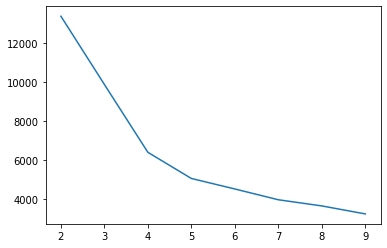

In [37]:
plt.plot(k,sse)

In [38]:
import seaborn as sns
df=pd.DataFrame(feature,columns=[i for i in range(len(feature[0]))])
df['label']=y_pred

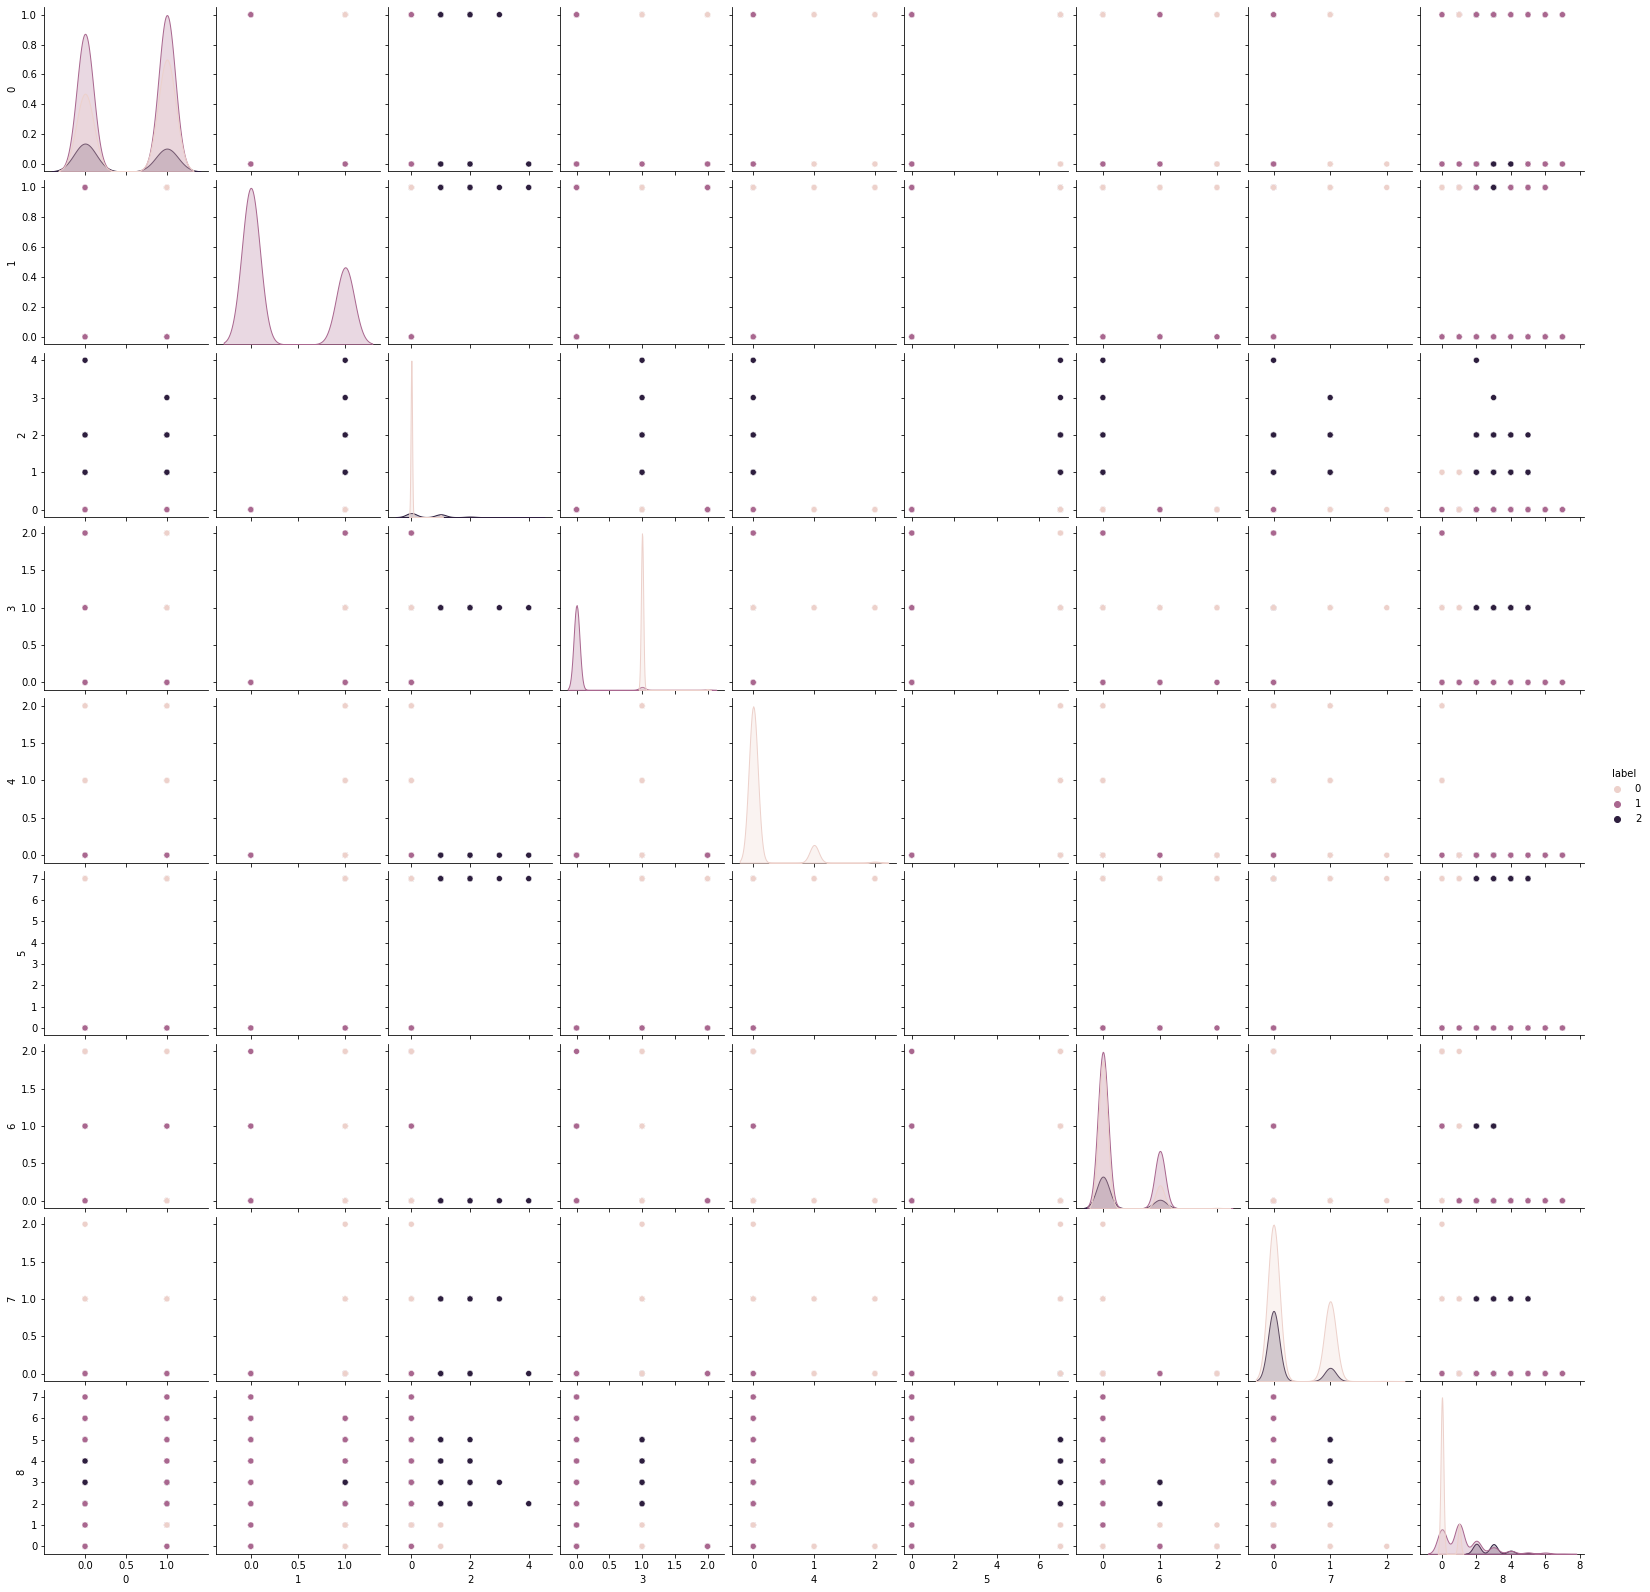

In [39]:
sns.pairplot(df,hue='label')